# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [1]:
# Pedir la interaccion con los aspectos necesarios del sistema operativo
import sys
!"{sys.executable}" -m pip install wbdata

# Importar base de datos
import wbdata

#Importar pandas (facilitan el trabajo con datos en forma de tablas)
import pandas as pd

#Definir el nombre de los indicadores
indicadores = {
    'NY.GDP.PCAP.CD': 'PBI per capita',
    'SL.UEM.TOTL.ZS': 'Tasa de desempleo'
}

# Obtener los datos desde World Bank
data = wbdata.get_dataframe(indicadores, country=['USA', 'ARG'])

# Formatear y organizar los datos
data = data.reset_index()  # Convierte índices en columnas
data = data.rename(columns={'date': 'Fecha', 'country': 'Pais'}) #Renombra las variables
df = pd.DataFrame(data=data) #Asigna las variables al dataframe de Pandas

df.head(100) #Muestra las primeras 100 filas de un dataframe


  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0


,Pais,Fecha,PBI per capita,Tasa de desempleo
0,Argentina,2023,14187.482725,6.139
1,Argentina,2022,13935.681111,6.805
2,Argentina,2021,10738.017922,8.736
3,Argentina,2020,8535.599380,11.461
4,Argentina,2019,9955.974787,9.843
...,...,...,...,...
95,United States,1992,25418.990776,7.500
96,United States,1991,24342.258905,6.800
97,United States,1990,23888.600009,NaN
98,United States,1989,22857.154433,NaN


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [3]:
# Crear tablas con los datos de cada indicador
df_pbi = data.pivot_table(index='Fecha', columns='Pais', values='PBI per capita')
df_desempleo = data.pivot_table(index='Fecha', columns='Pais', values='Tasa de desempleo')

# Filtrar ambos DataFrames para que solo contengan los años comunes.
años_comunes = df_pbi.index.intersection(df_desempleo.index)
df_pbi = df_pbi.loc[años_comunes]
df_desempleo = df_desempleo.loc[años_comunes]

# Redondear valores
df_pbi = df_pbi.round()
df_desempleo = df_desempleo.round()

# Configurar formato de salida para evitar notación científica
pd.options.display.float_format = '{:.0f}'.format

# Calcular estadísticas descriptivas
print("📊 Estadísticas descriptivas del PBI per cápita:")
print(df_pbi.describe())

print("\n📊 Estadísticas descriptivas de la tasa de desempleo:")
print(df_desempleo.describe())

📊 Estadísticas descriptivas del PBI per cápita:
Pais   Argentina  United States
count         33             33
mean        9007          46920
std         3293          15495
min         2570          24342
25%         7141          34515
50%         8150          47195
75%        12233          57040
max        14533          82769

📊 Estadísticas descriptivas de la tasa de desempleo:
Pais   Argentina  United States
count         33             33
mean          11              6
std            4              2
min            5              4
25%            8              5
50%            9              5
75%           14              7
max           20             10


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

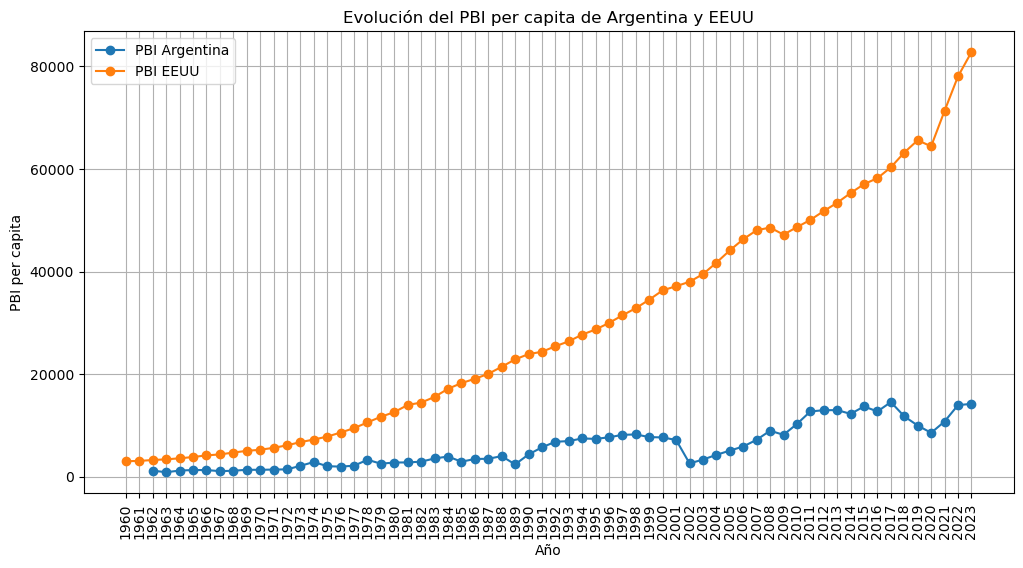

In [4]:
import matplotlib.pyplot as plt  # Importa la librería Matplotlib para hacer gráficos y la renombra como 'plt'

import pandas as pd  # Importa la librería Pandas para manipulación de datos y la renombra como 'pd'

import wbdata  # Importa wbdata, que se usa para acceder a datos del Banco Mundial

data = wbdata.get_dataframe(indicadores, country=['USA', 'ARG'])  
# Obtiene un DataFrame con datos de los indicadores especificados  
# para los países 'USA' (Estados Unidos) y 'ARG' (Argentina)  
# usando la librería wbdata (Banco Mundial).  

data = data.reset_index()  
# Restablece el índice del DataFrame, convirtiendo el índice anterior  
# (probablemente una columna de fechas u otro identificador) en una columna normal.  

data = data.rename(columns={'date': 'Fecha', 'country': 'Pais'})  
# Renombra las columnas del DataFrame:  
# 'date' pasa a llamarse 'Fecha'  
# 'country' pasa a llamarse 'Pais'  


# Pivotear la tabla para tener países como columnas y años como índice
df_pbi = data.pivot_table(index='Fecha', columns='Pais', values='PBI per capita')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_pbi.index, df_pbi['Argentina'], label='PBI Argentina', marker='o')
plt.plot(df_pbi.index, df_pbi['United States'], label='PBI EEUU', marker='o')
plt.xticks(rotation=90)    

plt.xlabel('Año')  
# Agrega una etiqueta al eje X del gráfico. En este caso, indica que  
# el eje X representa los años.  

plt.ylabel('PBI per capita')  
# Agrega una etiqueta al eje Y del gráfico. En este caso, indica que  
# el eje Y representa la tasa de desempleo.  

plt.title('Evolución del PBI per capita de Argentina y EEUU')  
# Establece un título para el gráfico. El título indica que el gráfico  
# muestra la evolución del PBI per cápita de Argentina y EE.UU.  
# Nota: Parece que hay una inconsistencia entre el título y la etiqueta del eje Y.  
# Si el gráfico muestra la tasa de desempleo, el título debería reflejarlo.  

plt.legend()  
# Muestra la leyenda del gráfico. La leyenda es útil si hay múltiples líneas  
# o series de datos en el gráfico. Para que funcione correctamente,  
# las líneas del gráfico deben tener etiquetas (`label='...'`) definidas.  

plt.grid(True)  
# Activa la cuadrícula en el gráfico, lo que facilita la lectura  
# de los valores en los ejes X e Y.  

plt.show()  
# Muestra el gráfico generado. Sin esta línea, el gráfico no aparecerá  
# en algunos entornos, como scripts de Python sin entornos interactivos.  


 


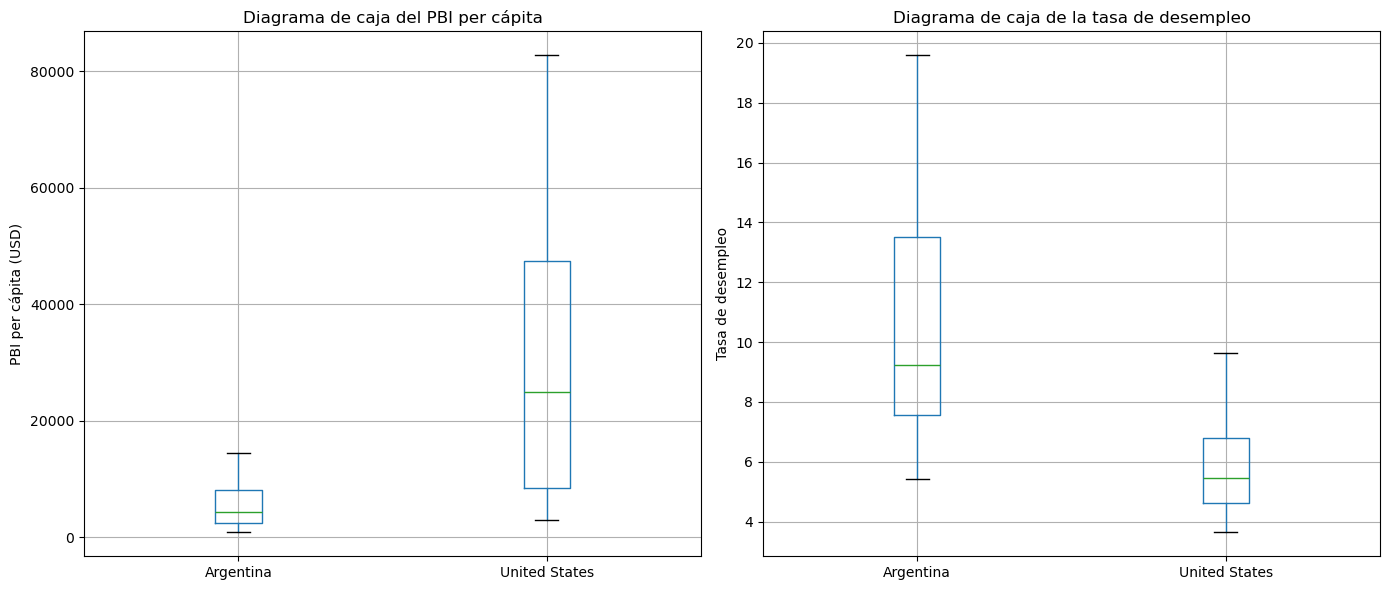

In [5]:
import pandas as pd  # Importamos la librería Pandas para manejar los datos en formato de DataFrame
import matplotlib.pyplot as plt  #  Importamos Matplotlib para crear gráficos
import wbdata  # Importamos wbdata para obtener datos del Banco Mundial

# 🔹 Configuración de indicadores y países
indicadores = {
    'NY.GDP.PCAP.CD': 'PBI per cápita',  #  Indicador del PIB per cápita en dólares corrientes
    'SL.UEM.TOTL.ZS': 'Tasa de desempleo'  # Indicador de la tasa de desempleo en porcentaje
}

# 🔹 Descargamos los datos desde el Banco Mundial para Argentina y EE.UU.
data = wbdata.get_dataframe(indicadores, country=['USA', 'ARG'])

# 🔹 Reseteamos el índice para convertir la columna de fechas en una columna normal
data = data.reset_index()

# 🔹 Renombramos las columnas para que sean más descriptivas
data = data.rename(columns={'date': 'Fecha', 'country': 'Pais'})

# 🔹 Transformamos la tabla para organizar los datos en función de los países
df_pbi_per_capita = data.pivot_table(index='Fecha', columns='Pais', values='PBI per cápita')
df_desempleo = data.pivot_table(index='Fecha', columns='Pais', values='Tasa de desempleo')

# 🔹 Creamos una figura con 2 subgráficos en la misma visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  #  1 fila y 2 columnas, tamaño de la figura de 14x6 pulgadas

# 🔹 Gráfico de caja (boxplot) para el PIB per cápita
df_pbi_per_capita.boxplot(ax=axes[0])  #  Generamos el diagrama de caja en la primera posición (izquierda)
axes[0].set_title('Diagrama de caja del PBI per cápita')  #  Título del gráfico
axes[0].set_ylabel('PBI per cápita (USD)')  #  Etiqueta del eje Y

# 🔹 Gráfico de caja para la tasa de desempleo
df_desempleo.boxplot(ax=axes[1])  #  Generamos el diagrama de caja en la segunda posición (derecha)
axes[1].set_title('Diagrama de caja de la tasa de desempleo')  #  Título del gráfico
axes[1].set_ylabel('Tasa de desempleo')  #  Etiqueta del eje Y

plt.tight_layout()  #  Ajustamos la disposición de los gráficos para evitar solapamientos
plt.show()  #  Mostramos la visualización


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [12]:
# Resolver acá
